In [1]:
# Enable interactive rotation of graph
# %matplotlib notebook
%matplotlib widget

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

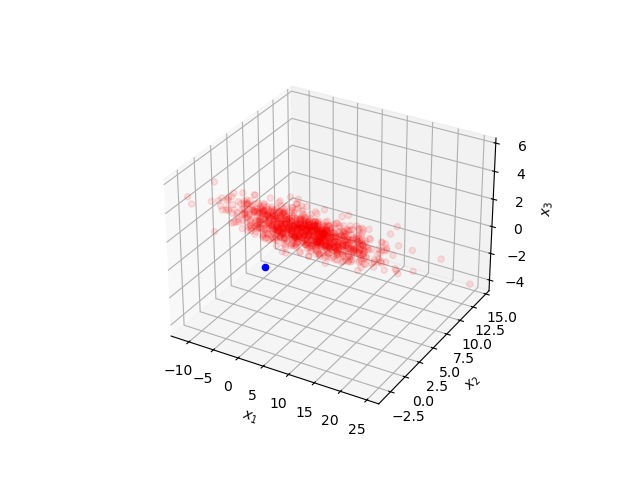

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

#### <font color='blue'>2a) Does the data appear to lie in a low-dimensional subspace? Why or why not? Remember the deﬁnition of a subspace.</font>


No, it does not lie in a low-dimensional subspace, because the line does not go through the origin.

#### <font color='blue'>2b) What could you do to the data so that it lies (approximately) in a low-dimensional subspace?</font>
 I couldsubsract the data by the meann to mak a low-dimensional line goes through the origin, making it a subspacee


In [3]:
# Subtract mean
X_m = X - np.mean(X, 0)

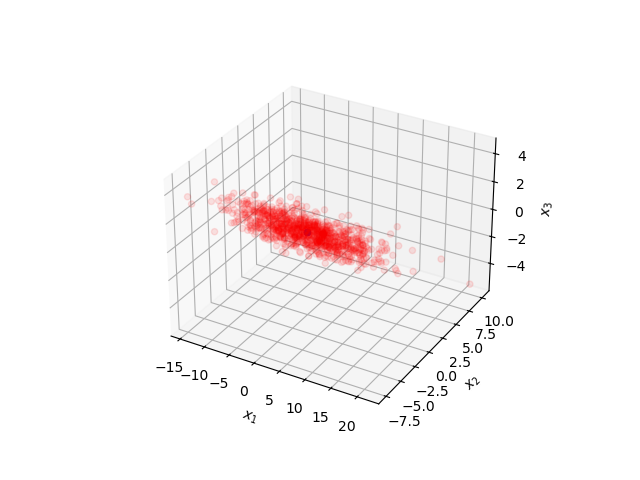

In [4]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

#### <font color='blue'>2c) The third section of the code removes the mean (average) value of the 1000 data points. Use the rotate tool to inspect the scatterplot of the data with the mean removed. Does the mean-removed data appear to lie in a low-dimensional sub-space</font>
 Yes, the mean-removed data appears to lie in a low-dimensional sub-space, becauseit goes through the origin.?

In [5]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[0,:] # a vector
# a = VT[:1,:] # a matrix

In [6]:
a.shape

(3,)

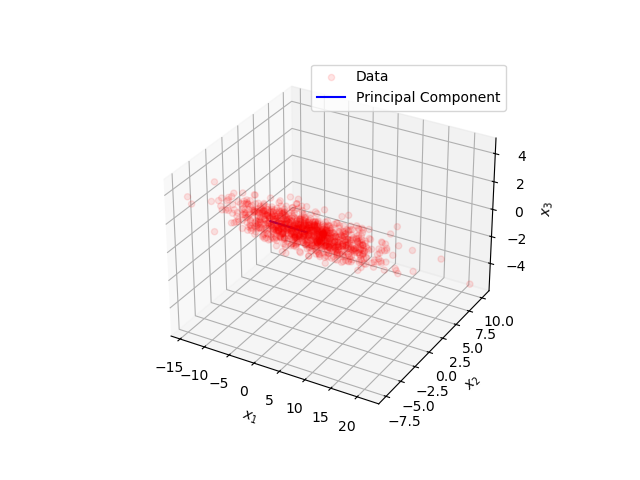

In [7]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

#### <font color='blue'>2d) comment on how well a one-dimensional subspace captures the data</font>

It captures the most important distribution direction of the dat.a

#### <font color='blue'>2e) Let xzi, i = 1, 2, . . . , 1000 be the individual mean-removed data points and a the unit-norm vector representing the best one-dimensional subspace for the data. Thus, xzi ≈ awi. Find wi in terms of the SVD matrices U, S, and V</font>.

In [8]:
# X_hat = U[:,:1] @ S_matrix[:1,:1] @VT[:1,:]
# a = vt1 --> wi = u1 @ S_matrix[:1,:1]
S_matrix = np.zeros_like(X_m)
np.fill_diagonal(S_matrix, s)
wi = U[:,:1] @ S_matrix[:1,:1]
wi.shape

(1000, 1)

#### <font color='blue'>2f) Now write the original data xi, i = 1, 2, . . . , 1000 as xi ≈ awi + b. What is b?</font>

b is the mean of X.

#### <font color='blue'>2g) Let E be the diﬀerence between X and the rank-one approximation. Find a mathematical expression for ||E||F2 in terms of the singular values of the mean-removed data Xz.</font>

In [9]:
X_hat = U[:,:1] @ S_matrix[:1,:1] @ VT[:1,:]
E = X_m - X_hat
np.linalg.norm(E,ord='fro')**(2)

626.6899203862777

#### <font color='blue'>2h) Now try a rank-two approximation. Use the SVD to ﬁnd an orthonormal basis for the best plane containing the mean-removed data. Display the mean-removed data and the bases for the plane.</font>.

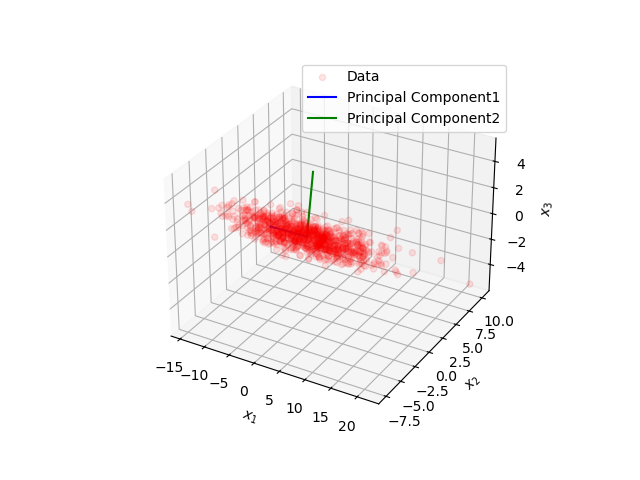

In [10]:
a1 = VT[0,:] 
a2 = VT[1,:] 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a1[0]],[0,ss*a1[1]],[0,ss*a1[2]], c='b',label='Principal Component1')
ax.plot([0,ss*a2[0]],[0,ss*a2[1]],[0,ss*a2[2]], c='g',label='Principal Component2')


ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

#### <font color='blue'>2i) Your rank-two approximation for the original data is xi ≈ a1w1i + a2w2i + b, i = 1, 2, . . . , 1000. Express w2i, i = 1, 2, . . . , 1000 in terms of the SVD of the mean-removed data matrix Xz. Display a scatter plot of the original data (in red) and the rank-two approximations in blue. Does the rank-two approximation lie in a plane? Does that plane capture the dominant components of the data?</font>

Indeed, the rank-2 approximation exists within a plane, and it's evident from the 3D chart that this plane effectively captures the most significant components of the data.

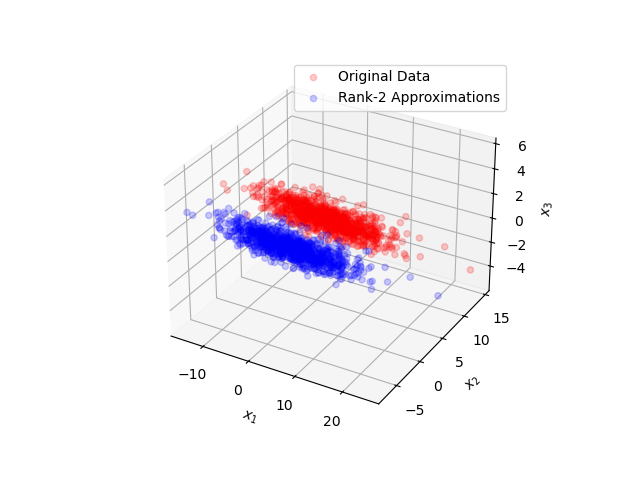

In [11]:
w2i = U[:,1:2] @ S_matrix[1:2,1:2]
X_hat = U[:,:2] @ S_matrix[:2,:2] @ VT[:2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', label='Original Data', alpha=0.2)
ax.scatter(X_hat[:,0], X_hat[:,1], X_hat[:,2], c='b', marker='o', label='Rank-2 Approximations', alpha=0.2)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

#### <font color='blue'>2j) Let E be the diﬀerence between X and the rank-two approximation. Find a mathematical expression for ||E||F2 in terms of the singular values of the mean-removed data Xz.</font>

In [12]:
E = X_m - X_hat
np.linalg.norm(E,ord='fro')**(2)

152.9455757788646

#### <font color='blue'>2k) Find and compare the numerical values for ||E||F2 using both the rank-1 and rank-2 approximation.</font>

The approximation error for rank-1 is approximately 626.69, whereas for rank-2, it is about 152.95. This significant reduction in error with rank-2 demonstrates that it captures more essential features of the data compared to the rank-1 model.




#### <font color='blue'>3a) Truncated SVD. Use the pseudo-inverse V Σr−1UT , where Σr−1 is computed by inverting the r largest singular values. Hence the regularization parameter r takes values r = 1, 2, . . . , 9.</font>

In [13]:
data = loadmat('face_emotion_data.mat')
X, y = data['X'], data['y']

total_error = []
for i in range(8):
    for j in range(8):
        if i == j: continue
            
        test_idx_1 = np.arange(i*16, (i+1)*16)
        test_idx_2 = np.arange(j*16, (j+1)*16)
        train_idx = np.setdiff1d(np.arange(128), test_idx_1)
        train_idx = np.setdiff1d(train_idx, test_idx_2)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]
        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]
        
        param = 0
        lowest = 1
        
        for r in range(1,10):
            U, s, VT = np.linalg.svd(X_train, full_matrices=False)
            S = np.diag(1/ s[:r])
            approx = VT[:r, :].T @ S @ U[:,:r].T @ y_train
            
            y_pred = np.sign(X_test_2 @ approx)
            error = []
            for idx, item in enumerate(y_pred):
                if item == y_test_2[idx]:
                    error.append(0)
                else:
                    error.append(1)
            error_percentage = sum(error) / len(error)
            # print(error_percentage)
            
            if error_percentage < lowest:
                lowest = error_percentage
                param = r

        U, s, VT = np.linalg.svd(X_train, full_matrices=False)
        S = np.diag(1/ s[:param])
        w = VT[:param, :].T @ S @ U[:,:param].T @ y_train
        
        y_pred_1 = np.sign(X_test_1 @ w)
        error = []
        
        for idx, item in enumerate(y_pred_1):
            if item == y_test_1[idx]:
                error.append(0)
            else:
                error.append(1)
                
        error_percentage = sum(error) / len(error)
        # print(error_percentage)
        total_error.append(error_percentage)

print("Error SVD: ", sum(total_error)/ 56)

Error SVD:  0.11160714285714286


#### <font color='blue'>3b) Ridge Regression</font>

In [14]:
total_error = []
for i in range(8):
    for j in range(8):
        param = 0
        lowest = 1
        
        lambda_list = [0, 0.5, 1, 2, 4, 8, 16]
        
        if i == j: continue
            
        test_idx_1 = np.arange(i*16, (i+1)*16)
        test_idx_2 = np.arange(j*16, (j+1)*16)
        train_idx = np.setdiff1d(np.arange(128), test_idx_1)
        train_idx = np.setdiff1d(train_idx, test_idx_2)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]
        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]
        
        for x in lambda_list:
            U, s, VT = np.linalg.svd(X_train, full_matrices=False)
            S = s / (s**2 +x)
            S = np.diag(S)
            
            w = VT.T @ S @ U.T @y_train
            
            y_pred = np.sign(X_test_2 @ w)
            error = []
            for idx, item in enumerate(y_pred):
                if item == y_test_2[idx]:
                    error.append(0)
                else:
                    error.append(1)
            error_percentage = sum(error) / len(error)
            # print(error_percentage)
                    
            if error_percentage < lowest:
                lowest = error_percentage
                param = x
                
        U, s, VT = np.linalg.svd(X_train, full_matrices=False)
        S = s / (s**2 + param)
        S = np.diag(S)
        # print(S)
        
        new_w = VT.T @ S @ U.T @y_train
        y_pred_1 = np.sign(X_test_1 @ new_w)
        
        error = []
        for idx, item in enumerate(y_pred_1):
            if item == y_test_1[idx]:
                error.append(0)
            else:
                error.append(1)
                
        error_percentage = sum(error) / len(error)
        total_error.append(error_percentage)
        
print("Error SVD - Ridge: ", sum(total_error)/ 56)

Error SVD - Ridge:  0.04799107142857143
